https://catalog.data.gov/dataset/data-breach-notifications-affecting-washington-residents-personal-information-breakdown

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv(r"C:\Users\hp\Downloads\Data_Breach_Notifications_Affecting_Washington_Residents__Personal_Information_Breakdown_.csv")

In [ ]:
df.head()

,Id,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,CyberattackType,WashingtoniansAffected,IndustryType,BusinessType,InformationType,Year,WashingtoniansAffectedRange,BreachLifecycleRange
0,9561,03/28/2018 12:00:00 AM,04/11/2018 12:00:00 AM,Cyberattack,2017-09-26T00:00:00,2017-10-12T00:00:00,Delta Airlines,Malware,24563.0,Business,Software,Name,2018,"10,000-49,999",100-199
1,9561,03/28/2018 12:00:00 AM,04/11/2018 12:00:00 AM,Cyberattack,2017-09-26T00:00:00,2017-10-12T00:00:00,Delta Airlines,Malware,24563.0,Business,Software,Financial & Banking Information,2018,"10,000-49,999",100-199
2,9561,03/28/2018 12:00:00 AM,04/11/2018 12:00:00 AM,Cyberattack,2017-09-26T00:00:00,2017-10-12T00:00:00,Delta Airlines,Malware,24563.0,Business,Software,Other,2018,"10,000-49,999",100-199
3,9562,03/28/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Cyberattack,2017-09-26T00:00:00,2017-10-12T00:00:00,"Best Buy Co, Inc.",Malware,8390.0,Business,Retail,Name,2018,"1,000-9,999",100-199
4,9562,03/28/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Cyberattack,2017-09-26T00:00:00,2017-10-12T00:00:00,"Best Buy Co, Inc.",Malware,8390.0,Business,Retail,Financial & Banking Information,2018,"1,000-9,999",100-199


In [ ]:
df.shape

(4018, 15)

In [ ]:
df.isna().sum()

Id                                0
DateAware                        81
DateSubmitted                     0
DataBreachCause                   0
DateStart                       553
DateEnd                         781
Name                              0
CyberattackType                1154
WashingtoniansAffected           82
IndustryType                      0
BusinessType                   2255
InformationType                   0
Year                              0
WashingtoniansAffectedRange       0
BreachLifecycleRange              0
dtype: int64

In [ ]:
df.drop(columns=['Id', 'Name' ,'DateAware', 'DateSubmitted','DateStart', 'DateEnd'],inplace=True)

In [ ]:
np.round((df.isna().sum()/len(df))*100,2).astype(str)+'%'

DataBreachCause                  0.0%
CyberattackType                28.72%
WashingtoniansAffected          2.04%
IndustryType                     0.0%
BusinessType                   56.12%
InformationType                  0.0%
Year                             0.0%
WashingtoniansAffectedRange      0.0%
BreachLifecycleRange             0.0%
dtype: object

In [ ]:
df.dtypes

DataBreachCause                 object
CyberattackType                 object
WashingtoniansAffected         float64
IndustryType                    object
BusinessType                    object
InformationType                 object
Year                             int64
WashingtoniansAffectedRange     object
BreachLifecycleRange            object
dtype: object

In [ ]:
df.InformationType.unique()

array(['Name', 'Financial & Banking Information', 'Other',
       'Health Insurance Policy or ID Number', 'Medical Information',
       'Username and Password/Security Question Answers',
       'Full Date of Birth', 'Social Security Number',
       "Driver's License or Washington ID Card Number",
       'Email Address and Password/Security Question Answers',
       'Military ID Number', 'Passport Number', 'Student ID Number',
       'Unique Private Key (e.g. used to authenticate or sign an electronic record)',
       'Biometric Data'], dtype=object)

In [ ]:
df.describe()

,WashingtoniansAffected,Year
count,3.936000e+03,4018.000000
mean,2.696853e+04,2021.064211
std,1.408230e+05,2.040262
min,1.500000e+01,2016.000000
25%,8.670000e+02,2020.000000
50%,1.709000e+03,2021.000000
75%,6.797000e+03,2023.000000
max,2.079648e+06,2024.000000


In [ ]:
df.CyberattackType.unique()

array(['Malware', nan, 'Unclear/unknown', 'Phishing', 'Other', 'Skimmers',
       'Ransomware'], dtype=object)

In [ ]:
df.CyberattackType=df['CyberattackType'].str.replace("/","or")
df.IndustryType=df['IndustryType'].str.replace("/","or")
df.InformationType=df['InformationType'].str.replace("/","or")
df.InformationType=df['InformationType'].str.replace(r"\(.*\)","")
# df.Name=df['Name'].str.replace(r"\(.*\)","")
df.WashingtoniansAffectedRange=df['WashingtoniansAffectedRange'].str.replace("-"," to ")
df.BreachLifecycleRange=df['BreachLifecycleRange'].str.replace("-"," to ")
df.IndustryType=df['IndustryType'].str.replace("Non-ProfitorCharity"," No Charity")


C:\Users\hp\AppData\Local\Temp\ipykernel_20892\2266665028.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.InformationType=df['InformationType'].str.replace(r"\(.*\)","")


In [ ]:
df.InformationType.unique()

array(['Name', 'Financial & Banking Information', 'Other',
       'Health Insurance Policy or ID Number', 'Medical Information',
       'Username and PasswordorSecurity Question Answers',
       'Full Date of Birth', 'Social Security Number',
       "Driver's License or Washington ID Card Number",
       'Email Address and PasswordorSecurity Question Answers',
       'Military ID Number', 'Passport Number', 'Student ID Number',
       'Unique Private Key ', 'Biometric Data'], dtype=object)

In [ ]:
df.CyberattackType.fillna(df.CyberattackType.mode()[0],inplace=True)
df.WashingtoniansAffected.fillna(df.WashingtoniansAffected.median(),inplace=True)
df.BusinessType.fillna(df.BusinessType.mode()[0],inplace=True)

In [ ]:
# # emp_promo.region=emp_promo["region"].astype('int')
df.WashingtoniansAffected=df['WashingtoniansAffected'].astype('int')

In [ ]:
df.isna().sum()

DataBreachCause                0
CyberattackType                0
WashingtoniansAffected         0
IndustryType                   0
BusinessType                   0
InformationType                0
Year                           0
WashingtoniansAffectedRange    0
BreachLifecycleRange           0
dtype: int64

In [ ]:
df.columns

Index(['DataBreachCause', 'CyberattackType', 'WashingtoniansAffected',
       'IndustryType', 'BusinessType', 'InformationType', 'Year',
       'WashingtoniansAffectedRange', 'BreachLifecycleRange'],
      dtype='object')

In [ ]:
df.duplicated().value_counts()

False    3968
True       50
dtype: int64

In [ ]:
# df[df.duplicated()]

In [ ]:
df

,DataBreachCause,CyberattackType,WashingtoniansAffected,IndustryType,BusinessType,InformationType,Year,WashingtoniansAffectedRange,BreachLifecycleRange
0,Cyberattack,Malware,24563,Business,Software,Name,2018,"10,000 to 49,999",100 to 199
1,Cyberattack,Malware,24563,Business,Software,Financial & Banking Information,2018,"10,000 to 49,999",100 to 199
2,Cyberattack,Malware,24563,Business,Software,Other,2018,"10,000 to 49,999",100 to 199
3,Cyberattack,Malware,8390,Business,Retail,Name,2018,"1,000 to 9,999",100 to 199
4,Cyberattack,Malware,8390,Business,Retail,Financial & Banking Information,2018,"1,000 to 9,999",100 to 199
...,...,...,...,...,...,...,...,...,...
4013,Cyberattack,Ransomware,1331,Education,Other,Full Date of Birth,2024,"1,000 to 9,999",1 to 99
4014,Cyberattack,Other,554,Business,Software,Name,2024,500 to 999,1 to 99
4015,Cyberattack,Other,554,Business,Software,Full Date of Birth,2024,500 to 999,1 to 99
4016,Cyberattack,Other,554,Business,Software,Health Insurance Policy or ID Number,2024,500 to 999,1 to 99


In [ ]:
df.WashingtoniansAffectedRange.unique()

array(['10,000 to 49,999', '1,000 to 9,999', '500 to 999', 'Unknown',
       '50,000 to 999,999', '< 500', '1,000,000+'], dtype=object)

In [ ]:
l=[]
for i in df.WashingtoniansAffectedRange:
    if i=='<500':
        l.append(1)
    elif i=='500 to 999':
        l.append(2)

    elif i=='1,000 to 9,999':
        l.append(2)

    elif i=='10,000 to 49,000':
        l.append(4)

    elif i=='50,000 to 999,999':
        l.append(5)

    elif i=='1,000,000+':
        l.append(6)

    else:
        l.append(7)

In [ ]:
df.WashingtoniansAffectedRange[:10]

0    10,000 to 49,999
1    10,000 to 49,999
2    10,000 to 49,999
3      1,000 to 9,999
4      1,000 to 9,999
5      1,000 to 9,999
6          500 to 999
7          500 to 999
8          500 to 999
9          500 to 999
Name: WashingtoniansAffectedRange, dtype: object

In [ ]:
df.WashingtoniansAffectedRange=l
df.WashingtoniansAffectedRange[:10]

0    7
1    7
2    7
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: WashingtoniansAffectedRange, dtype: int64

In [ ]:
df.BreachLifecycleRange.unique()

array(['100 to 199', 'Unknown', '200 to 299', '1 to 99', '0',
       '300 to 399', '500+', '400 to 499'], dtype=object)

In [ ]:
l=[]
for i in df.BreachLifecycleRange:
    if i=='1 to 99':
        l.append(1)
    elif i=='100 to 199':
        l.append(2)

    elif i=='200 to 299':
        l.append(2)

    elif i=='300 to 399':
        l.append(4)

    elif i=='400 to 499':
        l.append(5)

    elif i=='500+':
        l.append(6)

    else:
        l.append(7)

In [ ]:
df.BreachLifecycleRange=l
df.BreachLifecycleRange[:10]

0    2
1    2
2    2
3    2
4    2
5    2
6    7
7    7
8    7
9    7
Name: BreachLifecycleRange, dtype: int64

In [ ]:
df

,DataBreachCause,CyberattackType,WashingtoniansAffected,IndustryType,BusinessType,InformationType,Year,WashingtoniansAffectedRange,BreachLifecycleRange
0,Cyberattack,Malware,24563,Business,Software,Name,2018,7,2
1,Cyberattack,Malware,24563,Business,Software,Financial & Banking Information,2018,7,2
2,Cyberattack,Malware,24563,Business,Software,Other,2018,7,2
3,Cyberattack,Malware,8390,Business,Retail,Name,2018,2,2
4,Cyberattack,Malware,8390,Business,Retail,Financial & Banking Information,2018,2,2
...,...,...,...,...,...,...,...,...,...
4013,Cyberattack,Ransomware,1331,Education,Other,Full Date of Birth,2024,2,1
4014,Cyberattack,Other,554,Business,Software,Name,2024,2,1
4015,Cyberattack,Other,554,Business,Software,Full Date of Birth,2024,2,1
4016,Cyberattack,Other,554,Business,Software,Health Insurance Policy or ID Number,2024,2,1


In [ ]:
# label encoding on target column
from sklearn import preprocessing
lable_encoder= preprocessing.LabelEncoder()
df.CyberattackType=lable_encoder.fit_transform(df.CyberattackType)

In [ ]:
# for learning and converting data to numerical form
y=df['CyberattackType']
X=df.drop('CyberattackType',axis=1)

In [ ]:
# spliting the data into train and test set
# with this techniques the author devide dataset for training and testing

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=100)

In [ ]:
df.WashingtoniansAffectedRange.unique()

array([7, 2, 5, 6], dtype=int64)

In [ ]:
df

,DataBreachCause,CyberattackType,WashingtoniansAffected,IndustryType,BusinessType,InformationType,Year,WashingtoniansAffectedRange,BreachLifecycleRange
0,Cyberattack,0,24563,Business,Software,Name,2018,7,2
1,Cyberattack,0,24563,Business,Software,Financial & Banking Information,2018,7,2
2,Cyberattack,0,24563,Business,Software,Other,2018,7,2
3,Cyberattack,0,8390,Business,Retail,Name,2018,2,2
4,Cyberattack,0,8390,Business,Retail,Financial & Banking Information,2018,2,2
...,...,...,...,...,...,...,...,...,...
4013,Cyberattack,3,1331,Education,Other,Full Date of Birth,2024,2,1
4014,Cyberattack,1,554,Business,Software,Name,2024,2,1
4015,Cyberattack,1,554,Business,Software,Full Date of Birth,2024,2,1
4016,Cyberattack,1,554,Business,Software,Health Insurance Policy or ID Number,2024,2,1


In [ ]:
df.dtypes

DataBreachCause                object
CyberattackType                 int32
WashingtoniansAffected          int32
IndustryType                   object
BusinessType                   object
InformationType                object
Year                            int64
WashingtoniansAffectedRange     int64
BreachLifecycleRange            int64
dtype: object

In [ ]:
X_train_num=X_train.select_dtypes(include=["int64","int32"]) # seperating all numerical dtype columns
X_train_num.head()

,WashingtoniansAffected,Year,WashingtoniansAffectedRange,BreachLifecycleRange
584,1012,2021,2,1
417,815,2017,2,2
2574,772,2022,2,1
2695,13396,2022,7,2
1047,3585,2021,2,1


In [ ]:
X_train_cat=X_train.select_dtypes(include=["object"]) # seperating all object dtype columns
X_train_cat.head()

,DataBreachCause,IndustryType,BusinessType,InformationType
584,Cyberattack,Business,Retail,Name
417,Cyberattack,Finance,Other,Full Date of Birth
2574,Cyberattack,Health,Other,Medical Information
2695,Unauthorized Access,Business,Software,Financial & Banking Information
1047,Cyberattack,Education,Other,Name


In [ ]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # object creation

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), # to learn data from train set
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,WashingtoniansAffected,Year,WashingtoniansAffectedRange,BreachLifecycleRange
584,-0.176774,-0.035981,-0.501789,-0.867213
417,-0.178142,-1.998183,-0.501789,-0.489679
2574,-0.178440,0.454569,-0.501789,-0.867213
2695,-0.090812,0.454569,2.252108,-0.489679
1047,-0.158914,-0.035981,-0.501789,-0.867213


In [ ]:
X_train_cat

,DataBreachCause,IndustryType,BusinessType,InformationType
584,Cyberattack,Business,Retail,Name
417,Cyberattack,Finance,Other,Full Date of Birth
2574,Cyberattack,Health,Other,Medical Information
2695,Unauthorized Access,Business,Software,Financial & Banking Information
1047,Cyberattack,Education,Other,Name
...,...,...,...,...
3927,Cyberattack,Health,Other,Medical Information
3943,Cyberattack,Finance,Other,Social Security Number
1859,Cyberattack,Business,Retail,Name
2840,Cyberattack,Business,Legal,Financial & Banking Information


In [ ]:
X_train_cat.IndustryType.unique()

array(['Business', 'Finance', 'Health', 'Education', 'Government',
       ' No Charity'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder # to ensure that higher numbers are more important

encoder=OneHotEncoder(drop="first",min_frequency=1000,sparse=False)

X_train_cat_ohe=pd.DataFrame(encoder.fit_transform(X_train_cat),
                            columns=encoder.get_feature_names_out(X_train_cat.columns), # extract the feature name
                            index=X_train_cat.index)

X_train_cat_ohe.head()

,DataBreachCause_infrequent_sklearn,IndustryType_infrequent_sklearn,BusinessType_infrequent_sklearn
584,0.0,0.0,1.0
417,0.0,1.0,0.0
2574,0.0,1.0,0.0
2695,1.0,0.0,1.0
1047,0.0,1.0,0.0


In [ ]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

len(X_train_transformed)

3013

In [ ]:
# to seperate the categorical coluumns
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,DataBreachCause,IndustryType,BusinessType,InformationType
2497,Cyberattack,Business,Software,Username and PasswordorSecurity Question Answers
1225,Cyberattack,Business,Consumable,Financial & Banking Information
2242,Unauthorized Access,Business,Legal,Full Date of Birth
2201,Cyberattack,Health,Other,Medical Information
553,Unauthorized Access,Health,Other,Social Security Number


In [ ]:
# to seperate the numerical coluumns
X_test_num = X_test.select_dtypes(include=['int64','float64', 'int32'])

X_test_num.head()

,WashingtoniansAffected,Year,WashingtoniansAffectedRange,BreachLifecycleRange
2497,4774,2022,2,7
1225,9721,2021,2,7
2242,581,2021,2,1
2201,4305,2021,2,7
553,2876,2018,2,1


In [ ]:
# Rescale the numerical features in the test dataset using the previously fit scaler
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                   columns = X_test_num.columns,
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,WashingtoniansAffected,Year,WashingtoniansAffectedRange,BreachLifecycleRange
2497,-0.150661,0.454569,-0.501789,1.397990
1225,-0.116322,-0.035981,-0.501789,1.397990
2242,-0.179766,-0.035981,-0.501789,-0.867213
2201,-0.153916,-0.035981,-0.501789,1.397990
553,-0.163836,-1.507633,-0.501789,-0.867213


In [ ]:
# Transform the categorical features in the test dataset using the encoder
X_test_cat_ohe=pd.DataFrame(encoder.transform(X_test_cat),
                            columns=encoder.get_feature_names_out(X_test_cat.columns),
                            index=X_test_cat.index)

X_test_cat_ohe.head()

,DataBreachCause_infrequent_sklearn,IndustryType_infrequent_sklearn,BusinessType_infrequent_sklearn
2497,0.0,0.0,1.0
1225,0.0,0.0,1.0
2242,1.0,0.0,1.0
2201,0.0,1.0,0.0
553,1.0,1.0,0.0


In [ ]:
# concatinated the above tables
X_test_transformed=pd.concat([X_test_num_rescaled, X_test_cat_ohe],axis=1)
len(X_test_transformed) # length of the concatenated data

1005

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**************************************************
**************************************************
Accuracy : 0.8437810945273632
**************************************************


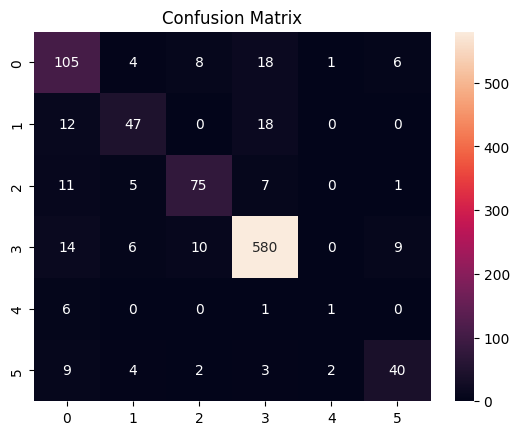

In [ ]:
# Import the KNeighborsClassifier class from scikit-learn and create an instance of it.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

# Fit the KNeighborsClassifier model on the transformed training data
classifier.fit(X_train_transformed, y_train)

# Use the trained classifier to make predictions on the transformed test data
y_test_pred=classifier.predict(X_test_transformed)

print('*'*50)

# to display the actual and predicted labels in the test dataset
temp_df=pd.DataFrame({"Actual":y_test,"predicted":y_test_pred})
temp_df

print('*'*50)

# Calculate and print the accuracy of the classifier on the test data.
print("Accuracy :",metrics.accuracy_score(y_test,y_test_pred))

print('*'*50)

sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

**************************************************
**************************************************
Accuracy:  0.6746268656716418
**************************************************


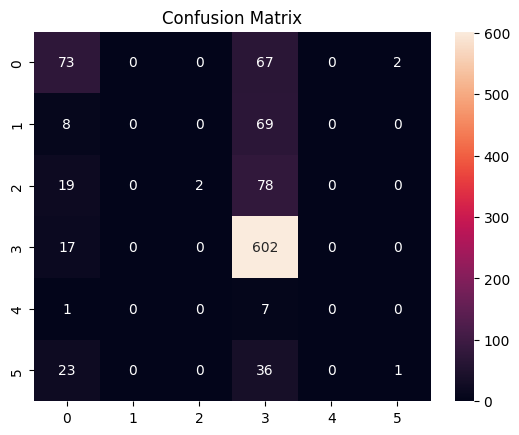

In [ ]:
# Import the Logistic regression class from scikit-learn and create an instance of it.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Fit the Logisitic Regression model on the transformed training data
classifier.fit(X_train_transformed, y_train)

# Use the trained classifier to make predictions on the transformed test data
y_test_pred=classifier.predict(X_test_transformed)

print('*'*50)

# to display the actual and predicted labels in the test dataset
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head(10)

print('*'*50)

# Calculate and print the accuracy of the classifier on the test data.
print('Accuracy: ', metrics.accuracy_score(y_test, y_test_pred))

print('*'*50)

sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.title("Confusion Matrix");
plt.show()

**************************************************
**************************************************
Accuracy : 0.9830845771144279
**************************************************


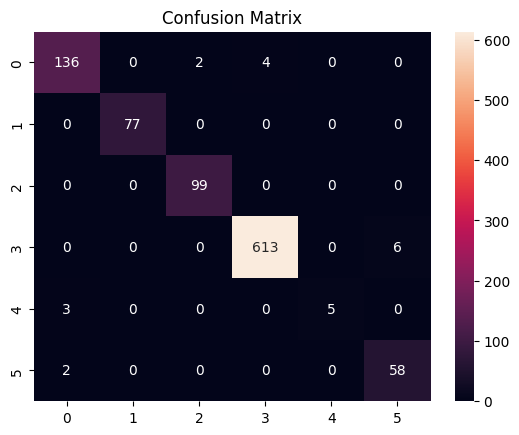

In [ ]:
# Import the Decison Tree class from scikit-learn and create an instance of it.
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Fit the Decison Tree model on the transformed training data
classifier.fit(X_train_transformed, y_train)

# Use the trained cassifier to make predictions on the transformed test data
y_test_pred=classifier.predict(X_test_transformed)

print('*'*50)

# to display the actual and predicted labels in the test dataset
temp_df=pd.DataFrame({"Actual":y_test,"predicted":y_test_pred})
temp_df.head(10)

print('*'*50)

# Calculate and print the accuracy of the classifier on the test data.
print("Accuracy :",metrics.accuracy_score(y_test,y_test_pred))

print('*'*50)


sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')

plt.title("Confusion Matrix")
plt.show()

**************************************************
**************************************************
Accuracy : 0.9860696517412936
**************************************************


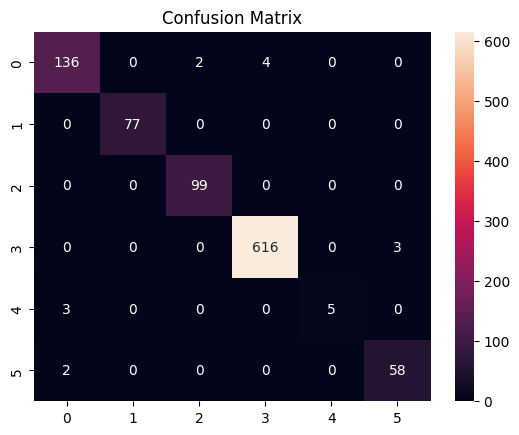

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

# Fit the Random Forest model on the transformed training data
classifier.fit(X_train_transformed, y_train)

# Use the trained classifier to make predictions on the transformed test data
y_test_pred=classifier.predict(X_test_transformed)

print('*'*50)

# to display the actual and predicted labels in the test dataset
temp_df=pd.DataFrame({"Actual":y_test,"predicted":y_test_pred})
temp_df.head(10)

print('*'*50)

# Calculate and print the accuracy of the classifier on the test data.
print("Accuracy :",metrics.accuracy_score(y_test,y_test_pred))

print('*'*50)

sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

**************************************************
0.9860696517412936
**************************************************


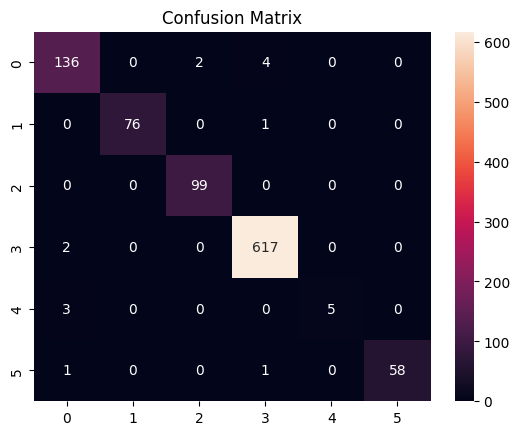

In [ ]:
# Import the XGBClassifier class from scikit-learn and create an instance of it.
from xgboost import XGBClassifier
model_xgb = XGBClassifier()

# Fit the XGB model on the transformed training data
model_xgb.fit(X_train_transformed, y_train)

# Use the trained classifier to make predictions on the transformed test data
y_test_pred = model_xgb.predict(X_test_transformed)

print('*'*50)

# Calculate and print the accuracy of the classifier on the test data.
print(metrics.accuracy_score(y_test,y_test_pred))

print('*'*50)
sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

**************************************************
0.7154228855721393
**************************************************


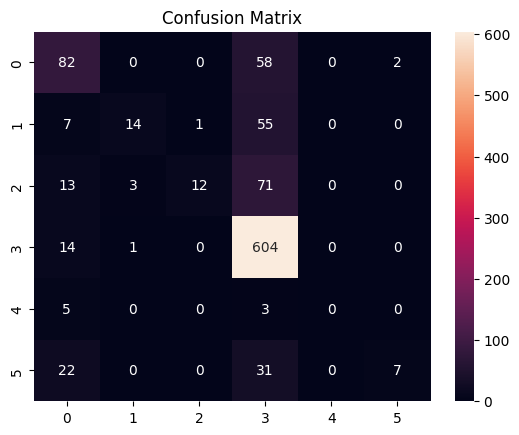

In [ ]:
# Import the SVC class from scikit-learn and create an instance of it.

from sklearn.svm import SVC
classifier = SVC()

# Fit the SVM model on the transformed training data
classifier.fit(X_train_transformed, y_train)

# Use the trained classifier to make predictions on the transformed test data
y_test_pred = classifier.predict(X_test_transformed)

print ('*'*50)

# Calculate and print the accuracy of the classifier on the test data.
print(metrics.accuracy_score(y_test, y_test_pred))

print ('*'*50)

sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()